In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

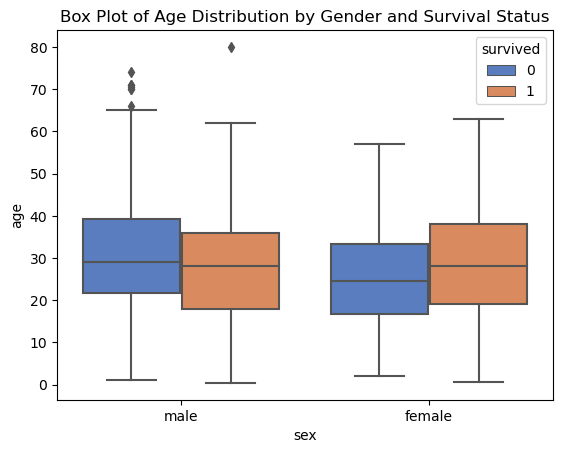

In [3]:
sns.boxplot(x='sex', y='age', hue='survived', data=titanic, palette='muted')
plt.title('Box Plot of Age Distribution by Gender and Survival Status')
plt.show()

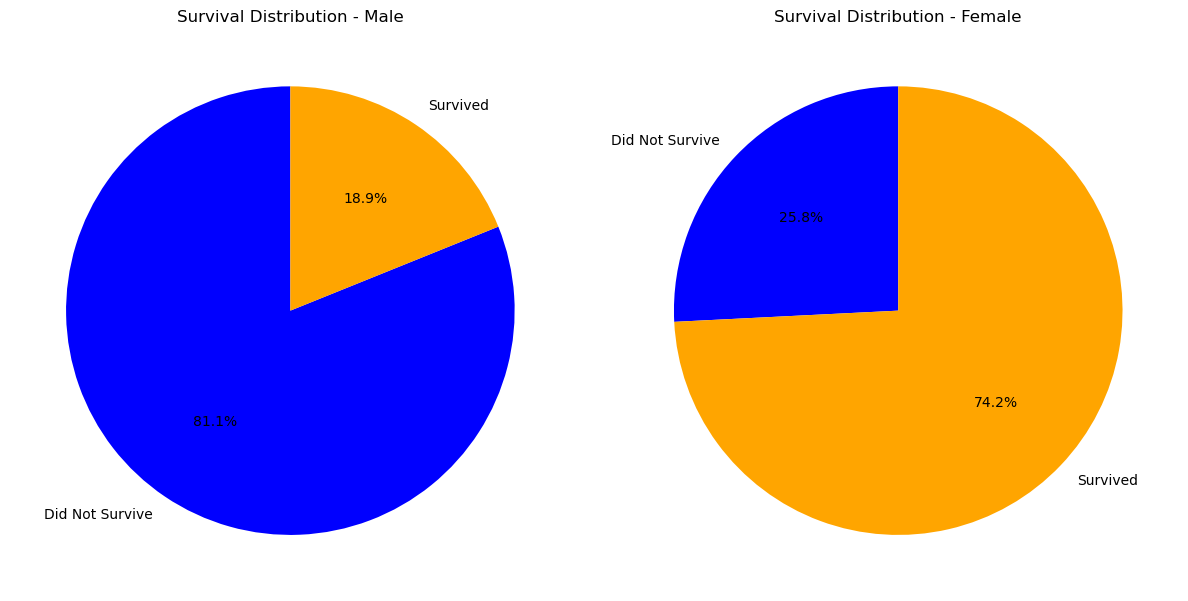

In [6]:
gender_survival = titanic.groupby(['sex', 'survived']).size().unstack()
labels = ['Did Not Survive', 'Survived']
colors = ['blue', 'orange']
fig, axes = plt.subplots(1, 2, figsize=(12,6))
for i, sex in enumerate(['male', 'female']):
    axes[i].pie(gender_survival.loc[sex], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90 )
    axes[i].set_title(f'Survival Distribution - {sex.capitalize()}')
plt.tight_layout()
plt.show()

Outliers:
      age   sex  survived
33   66.0  male         0
54   65.0  male         0
96   71.0  male         0
116  70.5  male         0
280  65.0  male         0
456  65.0  male         0
493  71.0  male         0
630  80.0  male         1
672  70.0  male         0
745  70.0  male         0
851  74.0  male         0


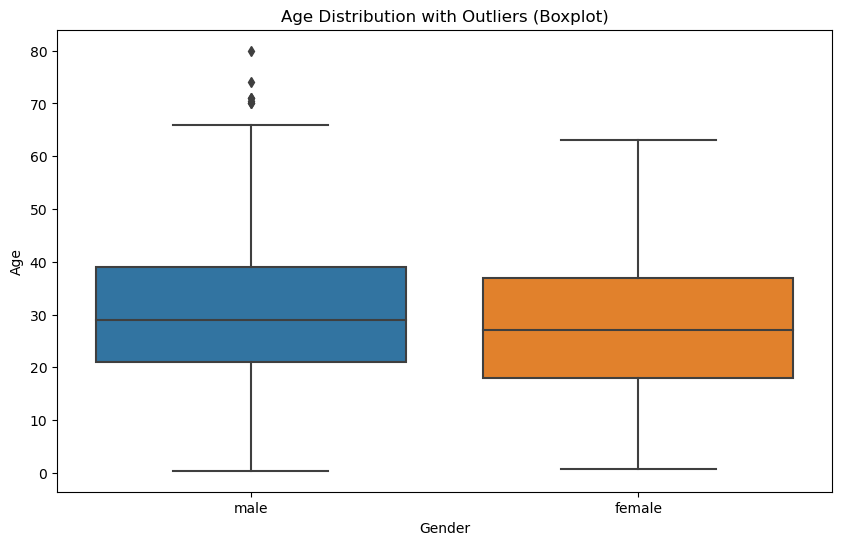

In [7]:
#Drop rows with missing 'age' values
titanic_cleaned = titanic.dropna(subset=['age'])

# Calculate the IQR for the 'age' column
Q1 = titanic_cleaned['age'].quantile(0.25)  # 25th percentile
Q3 = titanic_cleaned['age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = titanic_cleaned[(titanic_cleaned['age'] < lower_bound) | (titanic_cleaned['age'] > upper_bound)]

# Print out the outliers
print("Outliers:")
print(outliers[['age', 'sex', 'survived']])

# Plot the boxplot to visually show outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=titanic_cleaned)

# Add labels and title
plt.title('Age Distribution with Outliers (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Age')

# Display the plot
plt.show()